In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
dataset = pd.read_csv('insurance.csv')
dataset["smoker"] = dataset["smoker"].map({"yes": 1, "no": 0})
dataset["sex"] = dataset["sex"].map({"male": 1, "female": 0})
dataset["region"] = dataset["region"].map({
    "northeast": 0,
    "northwest": 1,
    "southeast": 2,
    "southwest": 3
})
dataset = pd.get_dummies(dataset, columns=["region"], prefix='r', prefix_sep='_')
# 1 hot encoding for smoker?
print(dataset.tail())

      age  sex   bmi  children  smoker  expenses  r_0  r_1  r_2  r_3
1333   50    1  31.0         3       0  10600.55    0    1    0    0
1334   18    0  31.9         0       0   2205.98    1    0    0    0
1335   18    0  36.9         0       0   1629.83    0    0    1    0
1336   21    0  25.8         0       0   2007.95    0    0    0    1
1337   61    0  29.1         0       1  29141.36    0    1    0    0


In [82]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[39.036446    0.49813083 30.737288    1.093458    0.19906542  0.24859811
   0.23551399  0.28130844  0.23457943]]


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [94]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(9, activation='relu'),
      layers.Dense(9, activation='relu'),
      layers.Dense(7, activation='relu'),
      layers.Dense(5, activation='relu'),
      layers.Dense(3, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.05),
                metrics=['MeanAbsoluteError', 'MeanSquaredError'])
  return model

model = build_and_compile_model(normalizer)
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_58 (Dense)            (None, 9)                 90        
                                                                 
 dense_59 (Dense)            (None, 9)                 90        
                                                                 
 dense_60 (Dense)            (None, 7)                 70        
                                                                 
 dense_61 (Dense)            (None, 5)                 40        
                                                                 
 dense_62 (Dense)            (None, 3)                 18        
                                                     

In [95]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

9/9 [==============================] - 0s 5ms/step - loss: 2111.5286 - mean_absolute_error: 2111.5286 - mean_squared_error: 33184244.0000


[2111.528564453125, 2111.528564453125, 33184244.0]

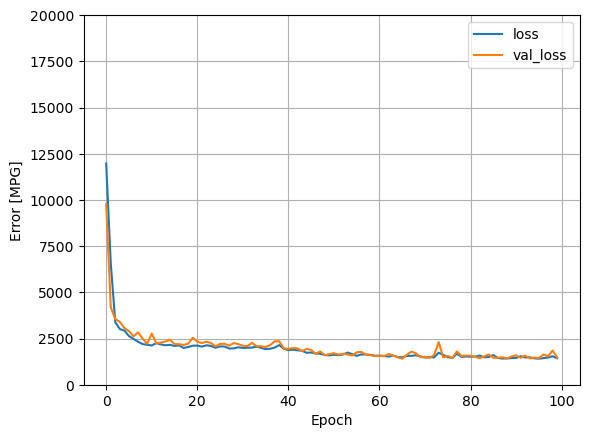

In [96]:
plot_loss(history)
model.evaluate(test_features, test_labels)

9/9 - 0s - loss: 2111.5286 - mean_absolute_error: 2111.5286 - mean_squared_error: 33184244.0000 - 52ms/epoch - 6ms/step
Testing set Mean Abs Error: 2111.53 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


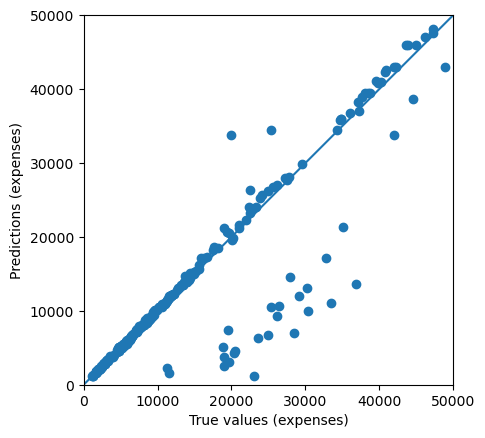

In [97]:
td = test_dataset.copy()
test_dataset = test_features

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)